# Tratamento do Dataset

In [8]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [9]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   object
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 300.8+ KB


In [10]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

1974 2024


#### correção: 'milage' -> INT

In [11]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [12]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [13]:
data.describe()

,model_year,milage,price
count,3207.000000,3207.000000,3.207000e+03
mean,2015.517930,64594.983785,4.487024e+04
std,6.131963,52387.260707,8.382969e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23151.500000,1.705000e+04
50%,2017.000000,52253.000000,3.169800e+04
75%,2020.000000,93450.000000,4.999650e+04
max,2024.000000,405000.000000,2.954083e+06


#### NULL's

In [14]:
data.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       147
engine            0
transmission      0
ext_col           0
int_col           0
accident         89
clean_title     467
price             0
dtype: int64

#### counts

In [15]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].nunique() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
# data['ext_col'].value_counts()# 11 -> nao se sabe
# data['int_col'].value_counts() # 98 -> nao se sabe
# for preco in data['price']: # tudo certo
#     if not isinstance(preco, int):
#         print('erro')

transmission
A/T                                                                 841
8-Speed A/T                                                         325
Transmission w/Dual Shift Mode                                      321
6-Speed A/T                                                         283
6-Speed M/T                                                         195
Automatic                                                           190
7-Speed A/T                                                         165
8-Speed Automatic                                                   140
10-Speed A/T                                                        102
5-Speed A/T                                                          68
4-Speed A/T                                                          59
9-Speed A/T                                                          57
6-Speed Automatic                                                    54
1-Speed A/T                                        

In [16]:
len(data['milage'])
# len(data['milage'].unique())

3207

##### --> nº de velocidades na transmissão existentes no dataset

In [17]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

[1, 2, 4, 5, 6, 7, 8, 9, 10]

#### verificar significado de '-' e NaN para o tipo de combustível

In [18]:
len(data.loc[data['fuel_type'] == '–'])

38

In [19]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [20]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
399,Kia,EV6 Wind,2022,11945,NaN,111.2Ah / FR 70kW / RR 160kW (697V),Automatic,Glacier,Black,None reported,NaN,38998
1311,Ford,Mustang Mach-E Select,2023,923,NaN,Standard Range Battery,Automatic,Rapid Red Metallic Tinted Clearcoat,Black Onyx,None reported,NaN,46998
1552,Tesla,Model Y Long Range,2022,4665,NaN,Dual Motor - Standard,Automatic,Silver,Black,None reported,NaN,46598
2622,Tesla,Model Y Long Range,2022,9411,NaN,Dual Motor - Standard,Automatic,Silver,Black,None reported,NaN,47998


###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

model_year       Axes(0.125,0.11;0.227941x0.77)
milage        Axes(0.398529,0.11;0.227941x0.77)
price         Axes(0.672059,0.11;0.227941x0.77)
dtype: object

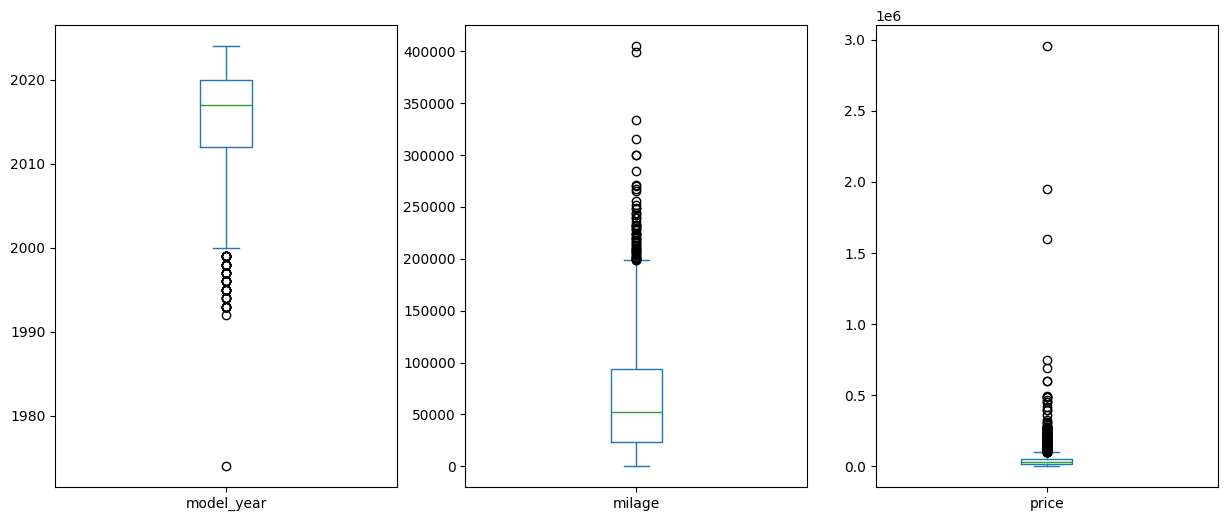

In [21]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [22]:
data[data['model_year']<1990] # outlier do 1º gráfico

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3143,Ford,Bronco,1974,6217,–,–,–,Dark Gray Metallic,–,None reported,Yes,115000


In [23]:
data[data['milage']>350000] # outlier do 2º gráfico

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
881,Mercedes-Benz,Sprinter 2500,2016,399000,Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,5-Speed A/T,Silver,–,At least 1 accident or damage reported,Yes,24500
1690,Honda,Accord Sport,2013,405000,Gasoline,185.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Black,Black,None reported,Yes,6000


In [24]:
data[data['price']>1500000] # outlier 3º gráfico

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1650,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,1950995
2484,Maserati,Quattroporte Base,2005,32000,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083
2564,Porsche,Carrera GT Base,2005,4400,Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000


#### BARPLOT

C:\Users\elisa\AppData\Local\Temp\ipykernel_22332\3643073267.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fuel_type'].fillna('Elétrico', inplace=True)


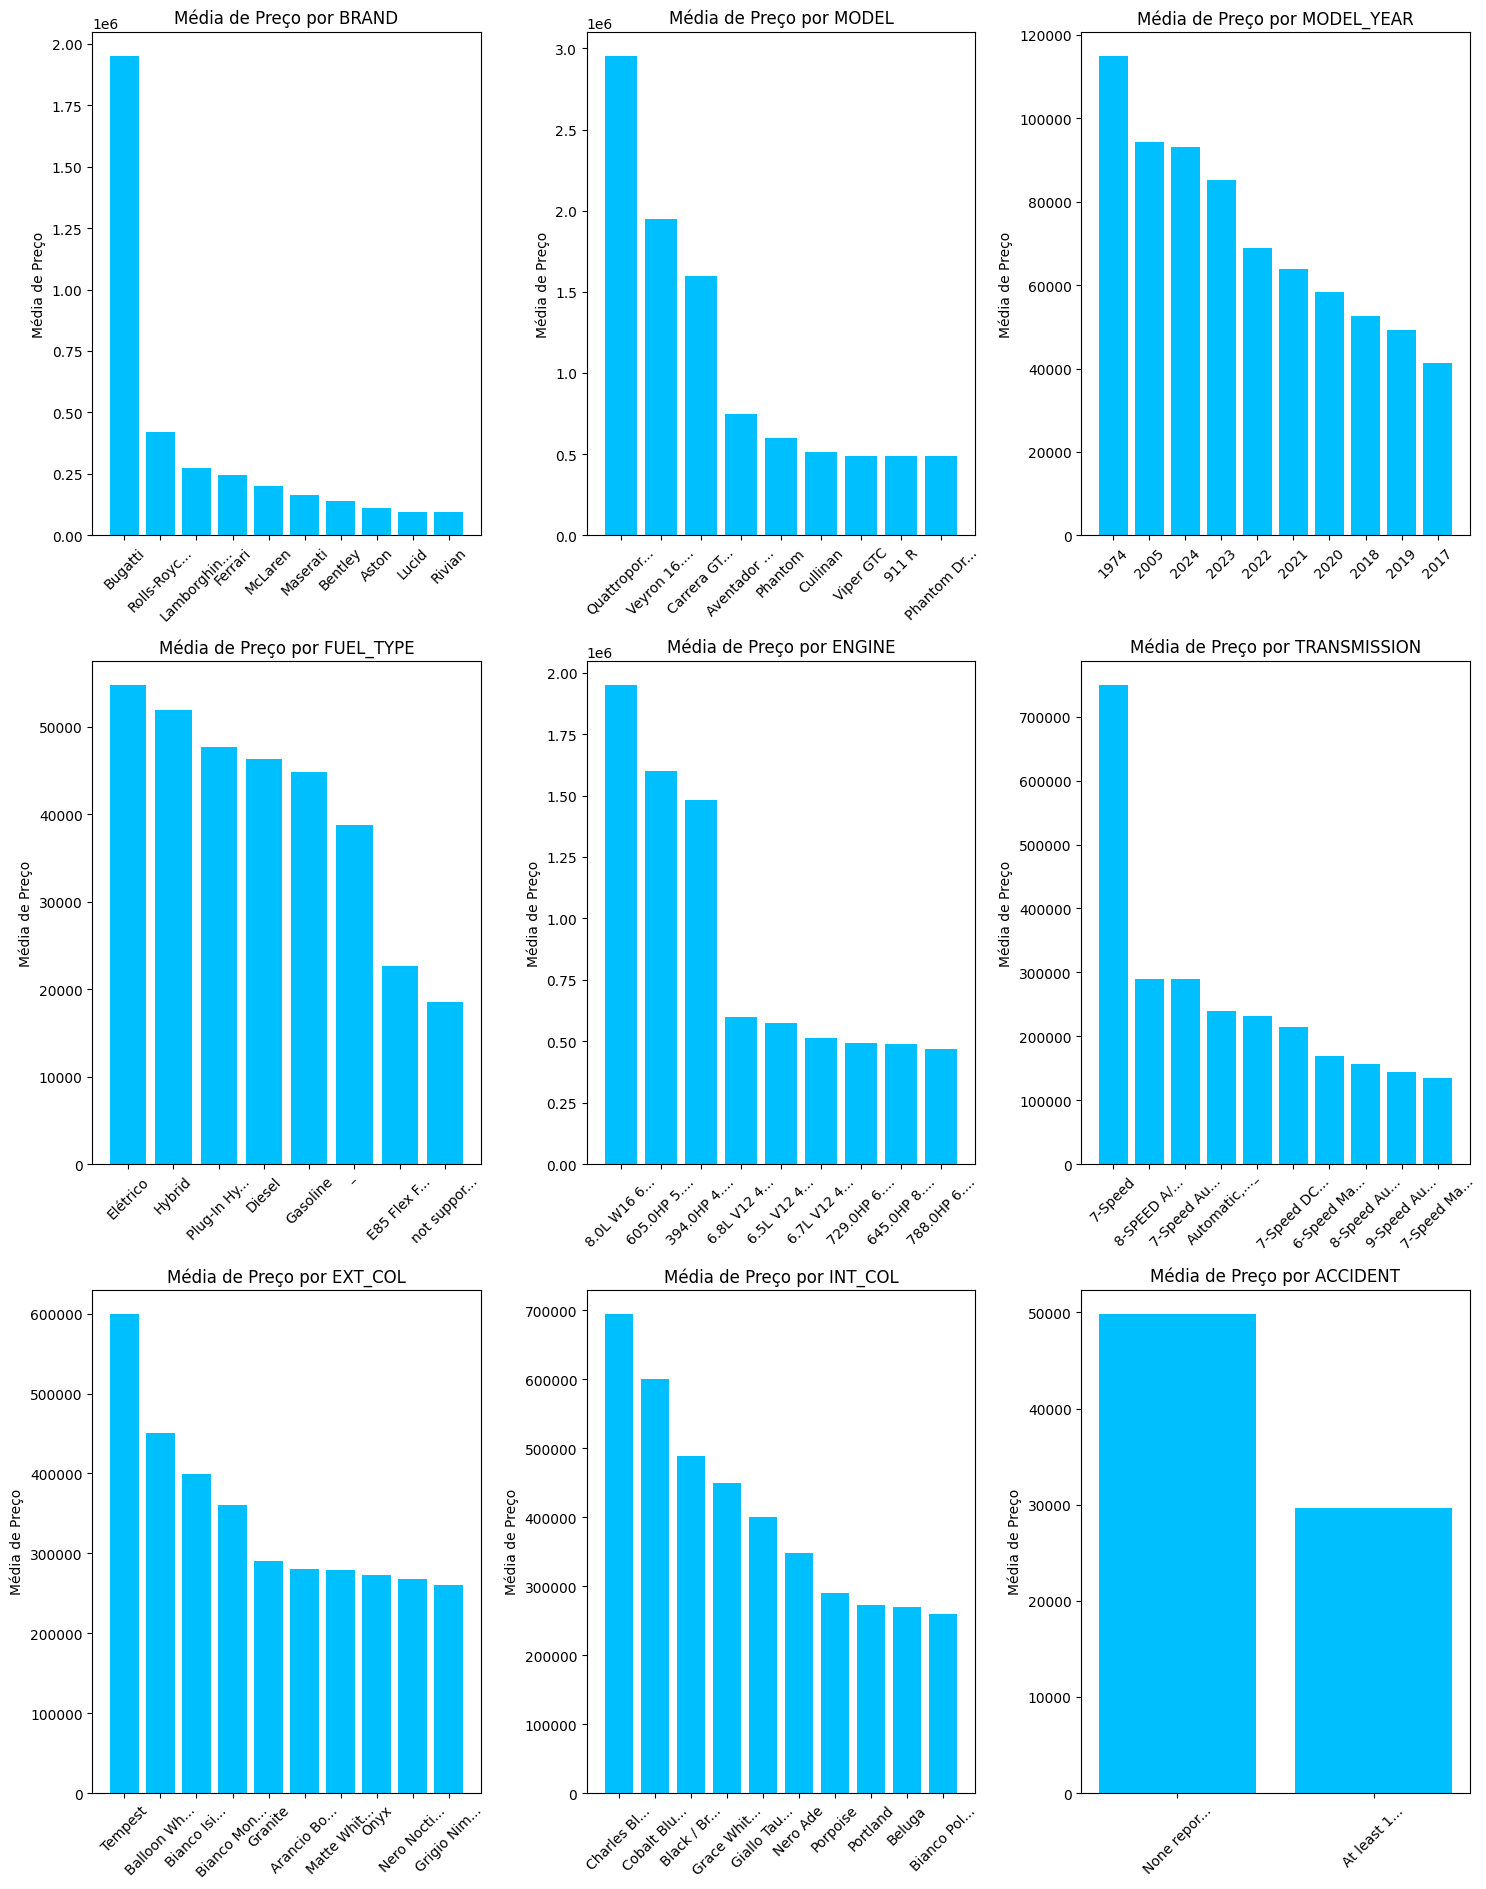

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [26]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

,brand,model,price
2484,Maserati,Quattroporte Base,2954083
1650,Bugatti,Veyron 16.4 Grand Sport,1950995
2564,Porsche,Carrera GT Base,1599000
2666,Lamborghini,Aventador SVJ Base,749950
572,Rolls-Royce,Cullinan,695000
2507,Rolls-Royce,Phantom,599995
26,Rolls-Royce,Phantom,599000
571,Lamborghini,Aventador S Base,491836
2030,Dodge,Viper GTC,489995
574,Porsche,911 R,489000


#### LINEPLOT

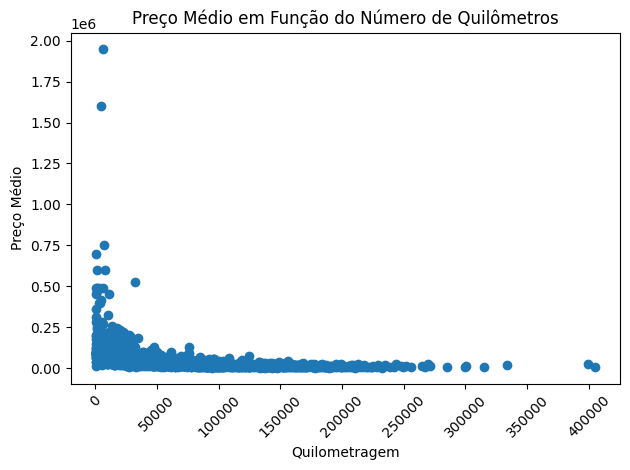

In [27]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [28]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

                          count          mean            std        min  \
brand         model_year                                                  
Acura         1993          1.0  9.020000e+04            NaN    90200.0   
              1995          1.0  1.099900e+04            NaN    10999.0   
              1998          1.0  5.500000e+03            NaN     5500.0   
              2003          1.0  4.000000e+03            NaN     4000.0   
              2005          3.0  6.499667e+03    1509.503340     4900.0   
              2006          1.0  1.499000e+04            NaN    14990.0   
              2007          1.0  7.700000e+03            NaN     7700.0   
              2008          1.0  1.000000e+04            NaN    10000.0   
              2010          2.0  1.144400e+04    3456.337946     9000.0   
              2011          2.0  8.750000e+03    4596.194078     5500.0   
              2012          1.0  1.900000e+04            NaN    19000.0   
              2013       

# [ENGINE] novos atributos 

In [29]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             3207 non-null   object 
 1   model             3207 non-null   object 
 2   model_year        3207 non-null   int64  
 3   milage            3207 non-null   int64  
 4   fuel_type         3207 non-null   object 
 5   engine            3207 non-null   object 
 6   transmission      3207 non-null   object 
 7   ext_col           3207 non-null   object 
 8   int_col           3207 non-null   object 
 9   accident          3118 non-null   object 
 10  clean_title       2740 non-null   object 
 11  price             3207 non-null   int64  
 12  Potencia          2578 non-null   float64
 13  Capacidade_Motor  3020 non-null   float64
 14  Numero_Cilindros  2851 non-null   float64
 15  Numero_Valvulas   395 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory 

In [31]:
data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

,engine,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas
0,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,285.0,3.60,6.0,NaN
1,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,270.0,3.50,6.0,NaN
2,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,208.0,2.50,4.0,NaN
3,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,260.0,2.40,4.0,NaN
4,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,301.0,4.60,8.0,NaN
5,153.0HP 2.3L 4 Cylinder Engine Gasoline Fuel,153.0,2.30,4.0,NaN
6,240.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,240.0,3.50,6.0,NaN
7,5.0L V8 32V PDI DOHC,NaN,5.00,8.0,32.0
8,115.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,115.0,1.60,4.0,NaN
9,305.0HP 6.8L 10 Cylinder Engine Gasoline Fuel,305.0,6.80,10.0,NaN


In [32]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

2812

#### BARPLOT

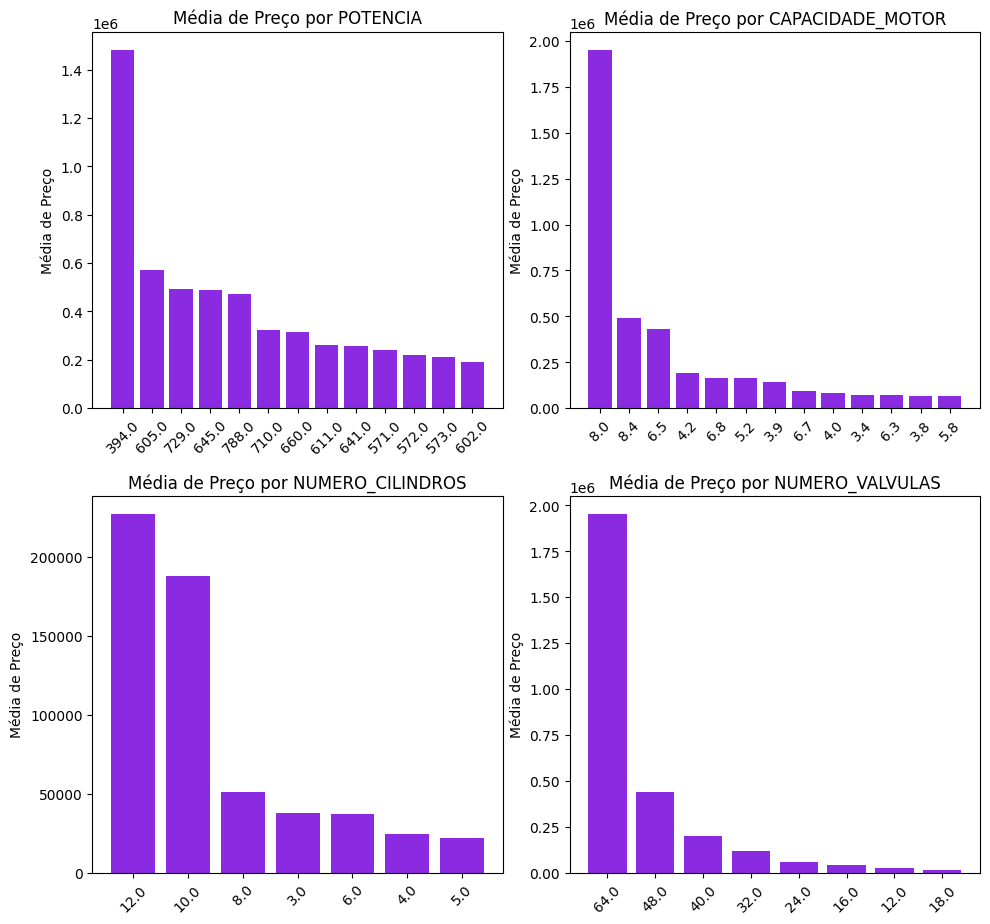

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [34]:
# data.loc[data['Numero_Valvulas'] == 32]

In [35]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

[nan, 12.0, 16.0, 18.0, 24.0, 32.0, 40.0, 48.0, 64.0]

In [36]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

[3.0, 4.0, 5.0, 6.0, 8.0, 10.0, nan, 12.0]

In [37]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [38]:
#sorted(data['Potencia'].unique())

# verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [39]:
data.loc[data['brand'] == 'Maybach'].head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas
1600,Maybach,Type 57 Base,2004,34254,Gasoline,543.0HP 5.5L 12 Cylinder Engine Gasoline Fuel,5-Speed A/T,Brown,–,None reported,Yes,64250,543.0,5.5,12.0,NaN


In [40]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [43]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [44]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             3207 non-null   object 
 1   model             3207 non-null   object 
 2   model_year        3207 non-null   int64  
 3   milage            3207 non-null   int64  
 4   fuel_type         3207 non-null   object 
 5   engine            3207 non-null   object 
 6   transmission      3207 non-null   object 
 7   ext_col           3207 non-null   object 
 8   int_col           3207 non-null   object 
 9   accident          3118 non-null   object 
 10  clean_title       2740 non-null   object 
 11  price             3207 non-null   int64  
 12  Potencia          2578 non-null   float64
 13  Capacidade_Motor  3020 non-null   float64
 14  Numero_Cilindros  2851 non-null   float64
 15  Numero_Valvulas   395 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory 

In [45]:
p.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas'],
      dtype='object')

In [46]:
print(p.duplicated().sum())

0


### Substituir pela mediana :
- num valvulas
- num cilindros
- potencia
- capacidade_motor

In [47]:
m = p['Numero_Valvulas'].median()
m2 = p['Numero_Cilindros'].median()
m3 = p['Potencia'].median()
m4 = p['Capacidade_Motor'].median()

p['Numero_Valvulas'].fillna(m, inplace=True)
p['Numero_Cilindros'].fillna(m2, inplace=True)
p['Potencia'].fillna(m3, inplace=True)
p['Capacidade_Motor'].fillna(m4, inplace=True)

C:\Users\elisa\AppData\Local\Temp\ipykernel_22332\1772360515.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p['Numero_Valvulas'].fillna(m, inplace=True)
C:\Users\elisa\AppData\Local\Temp\ipykernel_22332\1772360515.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

#### Clean title

In [48]:
p['clean_title'] = p['clean_title'].fillna('No')

### novos atributos (derivações)

In [49]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

#### T2

In [50]:
# import numpy as np
p['T2'] = p['transmission'].str.extract(r'(\d+)')
p['T2'] = pd.to_numeric(p['T2'], errors='coerce')
m5 = p['T2'].mean() 
p['T2'].fillna(round(m5), inplace=True)
#p.head()
#p['T2'].isnull().sum()
# p['T2'].unique()

#### Categoria ET (engine + transmission)

  File "c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


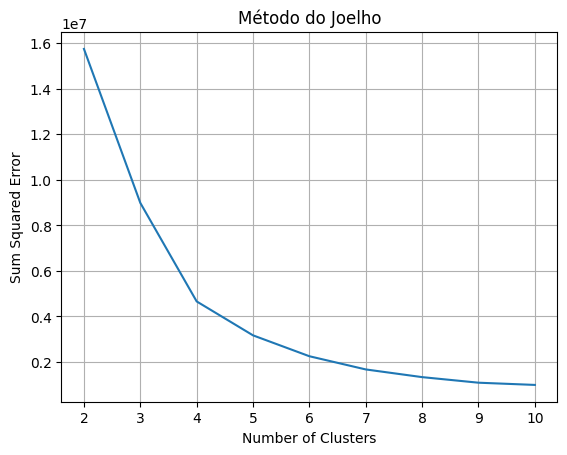

In [51]:
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
sse = []

for k in range(2, 11):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


# visualizar resultados
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Squared Error")
plt.title("Método do Joelho")
plt.grid()
plt.show()
plt.close()

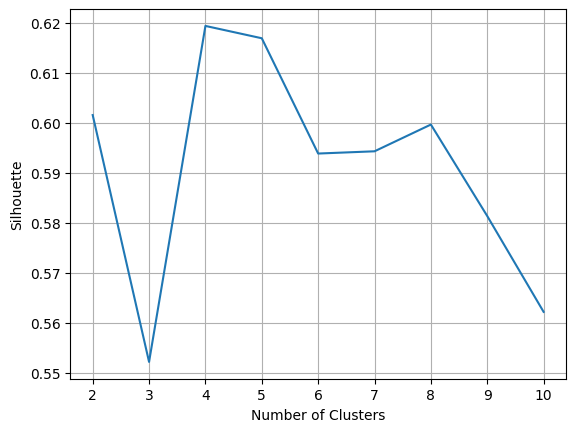

In [52]:
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
silhouette = []

for k in range(2, 11):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    clusters = kmeans.fit_predict(X)
    ss = silhouette_score(X, clusters)
    silhouette.append(ss)

# visualize results
plt.plot(range(2, 11), silhouette)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette")
plt.grid()
plt.show()
plt.close()

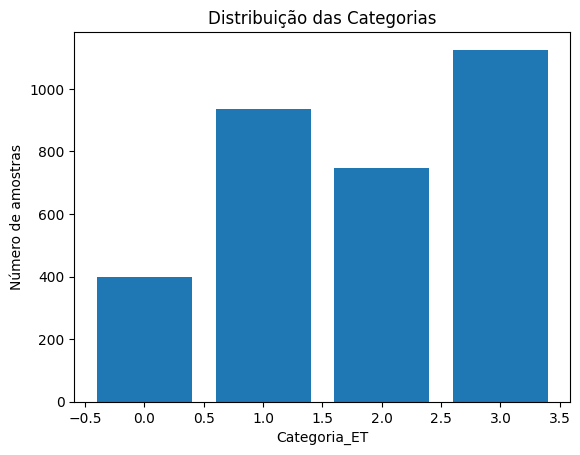

array([3, 2, 1, 0])

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 4

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar uma nova coluna 'Categoria' ao DataFrame com base nos clusters
p['Categoria_ET'] = kmeans.labels_
import matplotlib.pyplot as plt

# Contagem de amostras em cada categoria
categoria_counts = p['Categoria_ET'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(categoria_counts.index, categoria_counts.values)

# Adicionar rótulos e título
plt.xlabel('Categoria_ET')
plt.ylabel('Número de amostras')
plt.title('Distribuição das Categorias')

#Mostrar o gráfico
plt.show()

p['Categoria_ET'].unique()


In [58]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand             3207 non-null   object  
 1   model             3207 non-null   object  
 2   model_year        3207 non-null   int64   
 3   milage            3207 non-null   int64   
 4   fuel_type         3207 non-null   object  
 5   engine            3207 non-null   object  
 6   transmission      3207 non-null   object  
 7   ext_col           3207 non-null   object  
 8   int_col           3207 non-null   object  
 9   accident          3118 non-null   object  
 10  clean_title       3207 non-null   object  
 11  price             3207 non-null   int64   
 12  Potencia          3207 non-null   float64 
 13  Capacidade_Motor  3207 non-null   float64 
 14  Numero_Cilindros  3207 non-null   float64 
 15  Numero_Valvulas   3207 non-null   float64 
 16  T2                3207 n

In [54]:
p['Categoria_ET'] = p['Categoria_ET'].astype('category')

#### categoria Marca

In [55]:
frequencias = p['brand'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Marca'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Marca'
    else:
        return 'Média Frequência Marca'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Marca'] = p['brand'].map(frequencias.apply(categorizar))

p['Categoria_Marca'] = p['Categoria_Marca'].astype('category')
p['Categoria_Marca'].value_counts()

Categoria_Marca
Alta Frequência Marca     2246
Média Frequência Marca     928
Baixa Frequência Marca      33
Name: count, dtype: int64

#### Categoria Modelo

In [56]:
frequencias = p['model'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Modelo'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Modelo'
    else:
        return 'Média Frequência Modelo'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Modelo'] = p['model'].map(frequencias.apply(categorizar))
p['Categoria_Modelo'] = p['Categoria_Modelo'].astype('category')
p['Categoria_Modelo'].value_counts()
p['Categoria_Modelo'].unique()

['Alta Frequência Modelo', 'Baixa Frequência Modelo']
Categories (2, object): ['Alta Frequência Modelo', 'Baixa Frequência Modelo']

# normalidade das novas colunas (numéricas)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Lista das colunas numéricas que você deseja analisar
colunas_numericas = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2']

num_colunas = len(colunas_numericas)
fig, axs = plt.subplots(2, num_colunas, figsize=(15, 8))
print(f'Teste de Shapiro-Wilk: \n')

# Iterar sobre as colunas numéricas e plotar os gráficos em cada subplot
for i, coluna in enumerate(colunas_numericas):
    # Histograma
    sns.histplot(p[coluna], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'{coluna}')
    
    # Gráfico QQ
    stats.probplot(p[coluna], dist="norm", plot=axs[1, i])
    axs[1, i].set_title(f'QQ-plot')
 
    # Teste de Shapiro-Wilk
    stat, pv = stats.shapiro(p[coluna])
    print(f'{coluna}:')
    print(f'Valor p: {pv}')
    if pv > 0.05:
        print('Não podemos rejeitar a hipótese nula - A distribuição parece normal.')
    else:
        print('Rejeita-se a hipótese nula -> a distribuição não segue o modelo normal.')
    
plt.tight_layout()
plt.show()

como se pode observar, nenhum dos novos atributos (numéricos possuem distribuição normal)

# subset 1

- Substituição de valores nulos e '-' PELA MODA
- Remoção outliers LOF
- Variavies cat -> numerica

In [69]:
data1 = p

In [70]:
data1.describe()

,model_year,milage,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,T2
count,3207.000000,3207.000000,3.207000e+03,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000
mean,2015.517930,64594.983785,4.487024e+04,328.781727,3.686529,6.198004,23.718740,6.901154
std,6.131963,52387.260707,8.382969e+04,109.431029,1.379529,1.607770,2.781629,1.401103
min,1974.000000,100.000000,2.000000e+03,70.000000,0.650000,3.000000,12.000000,1.000000
25%,2012.000000,23151.500000,1.705000e+04,268.000000,2.500000,6.000000,24.000000,6.000000
50%,2017.000000,52253.000000,3.169800e+04,311.000000,3.500000,6.000000,24.000000,7.000000
75%,2020.000000,93450.000000,4.999650e+04,382.000000,4.600000,8.000000,24.000000,7.000000
max,2024.000000,405000.000000,2.954083e+06,1020.000000,8.400000,12.000000,64.000000,10.000000


In [71]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand             3207 non-null   object  
 1   model             3207 non-null   object  
 2   model_year        3207 non-null   int64   
 3   milage            3207 non-null   int64   
 4   fuel_type         3207 non-null   object  
 5   engine            3207 non-null   object  
 6   transmission      3207 non-null   object  
 7   ext_col           3207 non-null   object  
 8   int_col           3207 non-null   object  
 9   accident          3207 non-null   object  
 10  clean_title       3207 non-null   object  
 11  price             3207 non-null   int64   
 12  Potencia          3207 non-null   float64 
 13  Capacidade_Motor  3207 non-null   float64 
 14  Numero_Cilindros  3207 non-null   float64 
 15  Numero_Valvulas   3207 non-null   float64 
 16  T2                3207 n

In [72]:
data1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,T2,Categoria_ET,Categoria_Marca,Categoria_Modelo
0,Jeep,Wrangler Sport,2014,71000,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000,285.0,3.6,6.0,24.0,5.0,3,Alta Frequência Marca,Alta Frequência Modelo
1,Toyota,Highlander XLE,2015,68575,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000,270.0,3.5,6.0,24.0,7.0,3,Alta Frequência Marca,Alta Frequência Modelo
2,Toyota,Camry Hybrid XLE,2018,69641,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995,208.0,2.5,4.0,24.0,7.0,2,Alta Frequência Marca,Alta Frequência Modelo
3,Subaru,Outback Touring XT,2021,33500,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000,260.0,2.4,4.0,24.0,7.0,2,Média Frequência Marca,Baixa Frequência Modelo
4,Lexus,GX 460 Base,2018,75000,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095,301.0,4.6,8.0,24.0,6.0,1,Alta Frequência Marca,Alta Frequência Modelo


### NULL's substitution

In [73]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

mod7=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod6)

#### Categoria cor interna

In [74]:
frequencias = data1['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_IntCol'] = data1['int_col'].map(frequencias.apply(categorizar))
data1['Categoria_IntCol'] = data1['Categoria_IntCol'].astype('category')
data1['Categoria_IntCol'].value_counts()

Categoria_IntCol
Alta Frequência ext_col     3114
Baixa Frequência ext_col      93
Name: count, dtype: int64

In [75]:
data1['ext_col'].unique()

array(['Gray', 'Silver', 'White', 'Blue', 'Nightfall Mica', 'Red',
       'Emerald Green Metallic', 'Black', 'Daytona Gray Pearl Effect',
       'Majestic Black Pearl', 'Snowflake White Pearl', 'Purple',
       'Ingot Silver Metallic', 'Ebony Black', 'Gold',
       'Pacific Blue Metallic', 'Crystal Black Pearl', 'Mythos Black',
       'Green', 'Satin Steel Metallic', 'Blu', 'Cirrus Silver Metallic',
       'Orange', 'Red Multi', 'Deep Black Pearl Effect', 'Summit White',
       'Dark Slate Metallic', 'Bronze Dune Metallic', 'Beige',
       'Alpine White', 'Brown', 'Lunare White Metallic', 'Atomic Silver',
       'Magnetic Metallic', 'Yellow', 'DB Black Clearcoat',
       'Nightfall Gray Metallic', 'Oxford White', 'Lunar Silver Metallic',
       'Red Obsession', 'Bright White Clearcoat', 'Diamond Black',
       'Daytona Gray', 'Granite Crystal Clearcoat Metallic',
       'Black Clearcoat', 'Cajun Red Tintcoat', 'Magnetic Black',
       'Kinetic Blue', 'Balloon White', 'Black Cherry', 'L

##### Categoria cor externa

In [76]:
frequencias = data1['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_ExtCol'] = data1['ext_col'].map(frequencias.apply(categorizar))
data1['Categoria_ExtCol'] = data1['Categoria_ExtCol'].astype('category')
data1['Categoria_ExtCol'].value_counts()
data1['Categoria_ExtCol'].unique()

['Alta Frequência ext_col', 'Baixa Frequência ext_col']
Categories (2, object): ['Alta Frequência ext_col', 'Baixa Frequência ext_col']

In [77]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand             3207 non-null   object  
 1   model             3207 non-null   object  
 2   model_year        3207 non-null   int64   
 3   milage            3207 non-null   int64   
 4   fuel_type         3207 non-null   object  
 5   engine            3207 non-null   object  
 6   transmission      3207 non-null   object  
 7   ext_col           3207 non-null   object  
 8   int_col           3207 non-null   object  
 9   accident          3207 non-null   object  
 10  clean_title       3207 non-null   object  
 11  price             3207 non-null   int64   
 12  Potencia          3207 non-null   float64 
 13  Capacidade_Motor  3207 non-null   float64 
 14  Numero_Cilindros  3207 non-null   float64 
 15  Numero_Valvulas   3207 non-null   float64 
 16  T2                3207 n

## Correlações

In [128]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = subset_1_s_out.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)


Matriz de correlação de Spearman:
                             model_year    milage     price  Potencia  \
model_year                     1.000000 -0.700894  0.701359  0.251413   
milage                        -0.700894  1.000000 -0.756530 -0.298874   
price                          0.701359 -0.756530  1.000000  0.603223   
Potencia                       0.251413 -0.298874  0.603223  1.000000   
Capacidade_Motor              -0.097177  0.058055  0.245016  0.592209   
Numero_Cilindros              -0.090258  0.017413  0.275874  0.664519   
Numero_Valvulas               -0.151007  0.073337  0.025575 -0.009848   
T2                             0.392171 -0.282596  0.293862  0.161113   
Categoria_ET                  -0.149612  0.108874 -0.227280 -0.356545   
Categoria_MarcaModelo          0.190890 -0.192225  0.405831  0.652079   
Potencia_Capacidade_Relacao    0.352218 -0.375619  0.308727  0.238251   

                             Capacidade_Motor  Numero_Cilindros  \
model_year            

In [125]:
#va's categóricas
categorical_columns = subset_1_s_out.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(subset_1_s_out[column], subset_1_s_out['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

[('engine', 0.5708635920220341),
 ('accident', 0.26744804803467587),
 ('Categoria_ExtCol', 0.1500935956945671),
 ('transmission', 0.14298526869900738),
 ('Categoria_IntCol', 0.12873457050237835),
 ('int_col', 0.10756130011048284),
 ('brand', 0.022351008545729995),
 ('fuel_type', 0.01512517035646867),
 ('model', 0.004088079434666901),
 ('ext_col', -0.014642064472632527),
 ('Categoria_Modelo', -0.09975111099244523),
 ('Categoria_Marca', -0.15138659468902996),
 ('clean_title', -0.24596008135563424)]

## Outlier por IQR -> va. Numéricas

In [80]:
outlier_indices_dict = {}

# Variáveis Numéricas
for column in data1.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data1[column] > Q1 - 1.5*IQR) & (data1[column] < Q3 + 1.5*IQR))

    outlier_indices_dict[column] = data1.loc[~outlier_conditional].index
    
    num_outliers = len(data1[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

Número de outliers em 'model_year': 68
Número de outliers em 'milage': 58
Número de outliers em 'price': 198
Número de outliers em 'Potencia': 136
Número de outliers em 'Capacidade_Motor': 6
Número de outliers em 'Numero_Cilindros': 57
Número de outliers em 'Numero_Valvulas': 3207
Número de outliers em 'T2': 376


###### O número de válvulas têm muito pouca correlação com o preço -> N utiliza-se essa coluna para os cenários!
###### Remove-se os 6 registros da capacidade do motor e os 57 com num de cilindros e 376 do T2


##### Remover registros com outliers (cujo correlação baixa com preço)

In [81]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data1_s_out = data1.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data1_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data1_s_out))

Número de registros no novo conjunto de dados sem outliers: 2771


In [82]:
data1.to_csv('subset_1.csv', index=False) # sem normalizar com outliers
data1_s_out.to_csv('subset_1_s_out.csv', index=False) # sem normalizar sem outliers

# subset 2

-  substituir '-' por desconhecido
- Remoção outliers LOF
- Variavies cat -> numerica

In [83]:
data2=p

In [84]:
p.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2', 'Categoria_ET', 'Categoria_Marca',
       'Categoria_Modelo', 'Categoria_IntCol', 'Categoria_ExtCol'],
      dtype='object')

### NULL's substitution

### Fuel Type

In [85]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

#### accident + engine + transmission + ex_col + int_col

In [86]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


#### Categoria cor interna

In [87]:
frequencias = data2['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência int_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência int_col'
    else:
        return 'Média Frequência int_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_IntCol'] = data2['int_col'].map(frequencias.apply(categorizar))
data2['Categoria_IntCol'] = data2['Categoria_IntCol'].astype('category')
data2['Categoria_IntCol'].value_counts()

Categoria_IntCol
Alta Frequência int_col     3114
Baixa Frequência int_col      93
Name: count, dtype: int64

#### Categoria cor externa

In [88]:
frequencias = data2['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    else:
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_ExtCol'] = data2['ext_col'].map(frequencias.apply(categorizar))
data2['Categoria_ExtCol'] = data2['Categoria_ExtCol'].astype('category')
data2['Categoria_ExtCol'].value_counts()

Categoria_ExtCol
Alta Frequência ext_col     3031
Baixa Frequência ext_col     176
Name: count, dtype: int64

### Correlações

In [89]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = p.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)

Matriz de correlação de Spearman:
                  model_year    milage     price  Potencia  Capacidade_Motor  \
model_year          1.000000 -0.718429  0.698830  0.261190         -0.106556   
milage             -0.718429  1.000000 -0.758839 -0.313988          0.048463   
price               0.698830 -0.758839  1.000000  0.614442          0.246794   
Potencia            0.261190 -0.313988  0.614442  1.000000          0.562609   
Capacidade_Motor   -0.106556  0.048463  0.246794  0.562609          1.000000   
Numero_Cilindros   -0.093323  0.002664  0.286044  0.635383          0.901587   
Numero_Valvulas    -0.136779  0.044956  0.057261  0.000422          0.174043   
T2                  0.422990 -0.297194  0.334416  0.177560         -0.015619   

                  Numero_Cilindros  Numero_Valvulas        T2  
model_year               -0.093323        -0.136779  0.422990  
milage                    0.002664         0.044956 -0.297194  
price                     0.286044         0.057261  

In [90]:
#va categorica
categorical_columns = subset_1_s_out.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(subset_1_s_out[column], subset_1_s_out['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

[('engine', 0.5708635920220341),
 ('accident', 0.26744804803467587),
 ('Categoria_ExtCol', 0.1500935956945671),
 ('transmission', 0.14298526869900738),
 ('Categoria_IntCol', 0.12873457050237835),
 ('int_col', 0.10756130011048284),
 ('brand', 0.022351008545729995),
 ('fuel_type', 0.01512517035646867),
 ('model', 0.004088079434666901),
 ('ext_col', -0.014642064472632527),
 ('Categoria_Modelo', -0.09975111099244523),
 ('Categoria_Marca', -0.15138659468902996),
 ('clean_title', -0.24596008135563424)]

### Outlier por IQR -> va.'s Numéricas

In [91]:
# Variáveis Numéricas
for column in data2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data2[column] > Q1 - 1.5*IQR) & (data2[column] < Q3 + 1.5*IQR))
    outlier_indices_dict[column] = data2.loc[~outlier_conditional].index
    
    num_outliers = len(data2[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

Número de outliers em 'model_year': 68
Número de outliers em 'milage': 58
Número de outliers em 'price': 198
Número de outliers em 'Potencia': 136
Número de outliers em 'Capacidade_Motor': 6
Número de outliers em 'Numero_Cilindros': 57
Número de outliers em 'Numero_Valvulas': 3207
Número de outliers em 'T2': 376


##### Remover registros com outliers (cuja correlação baixa com preço)

In [92]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data2_s_out = data2.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data2_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data2_s_out))

Número de registros no novo conjunto de dados sem outliers: 2771


In [93]:
data2.to_csv('subset_2.csv', index=False) # sem normalizar com outliers
data2_s_out.to_csv('subset_2_s_out.csv', index=False) # sem normalizar sem outliers

In [94]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand             3207 non-null   object  
 1   model             3207 non-null   object  
 2   model_year        3207 non-null   int64   
 3   milage            3207 non-null   int64   
 4   fuel_type         3207 non-null   object  
 5   engine            3207 non-null   object  
 6   transmission      3207 non-null   object  
 7   ext_col           3207 non-null   object  
 8   int_col           3207 non-null   object  
 9   accident          3207 non-null   object  
 10  clean_title       3207 non-null   object  
 11  price             3207 non-null   int64   
 12  Potencia          3207 non-null   float64 
 13  Capacidade_Motor  3207 non-null   float64 
 14  Numero_Cilindros  3207 non-null   float64 
 15  Numero_Valvulas   3207 non-null   float64 
 16  T2                3207 n

# MODELAÇÃO
### Como subset 1 é muito parecido com subset 2, só vamos utilizar o subset 1

In [124]:
import pandas as pd
subset_1=pd.read_csv('subset_1.csv')
subset_1_s_out=pd.read_csv('subset_1_s_out.csv')
pd.set_option('display.max_rows', None)

# Cenário 1

### com outliers

In [39]:
X1 = subset_1[['brand','model','model_year','milage','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title']]
y1 = subset_1['price'] 

#### label logaritmizada (preço) + normalização

### sem outliers

In [40]:
X1out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','engine','ext_col','int_col','accident','clean_title']] # tinha T2 » retirei...
y1out = subset_1_s_out['price'] 

# Cenário 2

#### com outliers

In [39]:
X2 = subset_1[['model_year', 'milage', 'fuel_type', 'accident', 'clean_title', 'Categoria_ET', 'Categoria_Marca', 'Categoria_Modelo', 'Categoria_IntCol', 'Categoria_ExtCol']]
y2 = subset_1['price'] 

#### sem outlier

In [ ]:
X2out = subset_1_s_out[['model_year','milage','fuel_type','accident','clean_title','Categoria_ET','Categoria_Marca','Categoria_Modelo','Categoria_IntCol','Categoria_ExtCol']]  
y2out = subset_1_s_out['price'] 

# Cenário 3

#### com outliers

In [ ]:
X3=subset_1[['Potencia','Capacidade_Motor','Numero_Cilindros','T2','model_year', 'milage', 'Numero_Valvulas']]
y3=subset_1['price']

#### sem outlier

In [ ]:
X3out = subset_1_s_out[['Potencia','Capacidade_Motor','Numero_Cilindros','T2','model_year', 'milage', 'Numero_Valvulas']] 
y3out = subset_1_s_out['price']

# Cenário 4

#### com outliers

In [ ]:
X4=subset_1[['brand','model','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title']]
y4=subset_1['price']

#### sem outliers

In [ ]:
X4out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title']]
y4out = subset_1_s_out['price']

# Cenário Extra

#### criação de relações entre atributos existentes

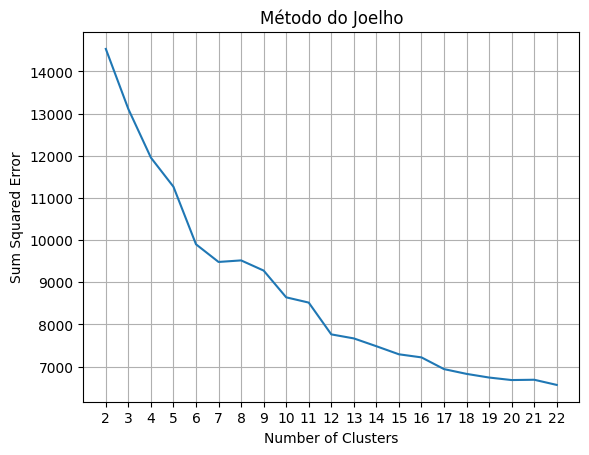

In [99]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

p=subset_1_s_out
v_catg = ['brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(p[v_catg + v_num])

sse = []

for k in range(2, 23):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X_preprocessed)
    sse.append(kmeans.inertia_)


# visualizar resultados
plt.plot(range(2, 23), sse)
plt.xticks(range(2, 23))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Squared Error")
plt.title("Método do Joelho")
plt.grid()
plt.show()
plt.close()

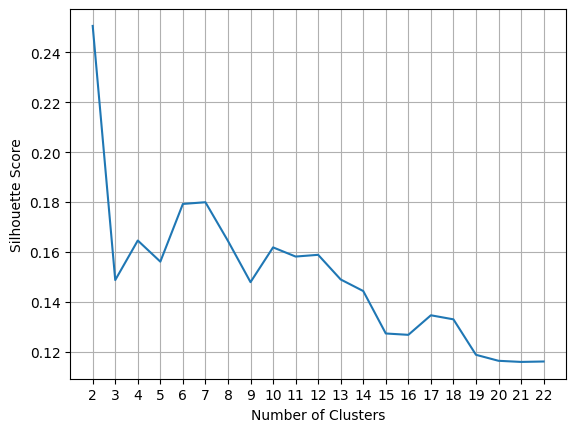

In [101]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(p[v_catg + v_num])

silhouette = []

for k in range(2, 23):
    kmeans = KMeans(n_clusters=k, random_state=12345)
    clusters = kmeans.fit_predict(X_preprocessed)
    ss = silhouette_score(X_preprocessed, clusters)
    silhouette.append(ss)

# Visualize the results
plt.plot(range(2, 23), silhouette)
plt.xticks(range(2, 23))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

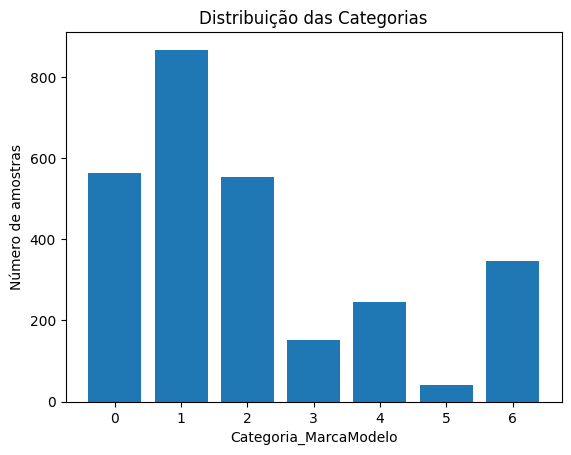

[4 1 0 5 2 6 3]


In [102]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


# Definir as colunas categóricas e numéricas
v_catg = ['brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']

# Criar transformador para colunas categóricas
categorical_transformer = OneHotEncoder()

# Criar um pipeline de pré-processamento que inclui OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Aplicar o pré-processamento aos dados
X = p[v_catg + v_num]
X_preprocessed = preprocessor.fit_transform(X)

# Definir o número de clusters
n_clusters = 7

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

# Adicionar uma nova coluna 'Categoria_MarcaModelo' ao DataFrame com base nos clusters
p['Categoria_MarcaModelo'] = kmeans.labels_

# Contagem de amostras em cada categoria
categoria_counts = p['Categoria_MarcaModelo'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(categoria_counts.index, categoria_counts.values)

# Adicionar rótulos e título
plt.xlabel('Categoria_MarcaModelo')
plt.ylabel('Número de amostras')
plt.title('Distribuição das Categorias')

# Mostrar o gráfico
plt.show()

# Mostrar categorias únicas
print(p['Categoria_MarcaModelo'].unique())

p['Categoria_MarcaModelo'] = p['Categoria_MarcaModelo'].astype('category')

# def condicao_do_veiculo(row):
#     if row['accident'] == 'At least 1 accident or damage reported' and row['clean_title'] == 'No':
#         return 'mau'
#     elif row['accident'] == 'None reported' and row['clean_title'] == 'Yes':
#         return 'bom'
#     else:
#         return 'avg'

# p['condicao_do_veiculo'] = p.apply(condicao_do_veiculo, axis=1)

# popularidade_do_modelo = p['model'].value_counts().to_dict()
# p['model_popularity'] = p['model'].map(popularidade_do_modelo)

# p['milage_por_ano'] = p['milage'] / (2024 - p['model_year'] + 1e-9)

p['Potencia_Capacidade_Relacao'] = p['Potencia'] / p['Capacidade_Motor']

In [103]:
p.to_csv('subset_1_s_out.csv', index=False) # sem normalizar com outliers

#### cenário extra

In [126]:
XX=subset_1_s_out[['Potencia','Capacidade_Motor','Numero_Cilindros','T2','model_year', 'brand','model','milage','fuel_type','ext_col','int_col','accident','clean_title','Potencia_Capacidade_Relacao', 'Categoria_MarcaModelo']]
yy=subset_1_s_out['price']

# previsões (regressão)

### Separar Data / Treinar e Avaliar Algoritmos

In [145]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
from slickml.metrics import (
    RegressionMetrics,
)  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
import shap

### cross validation

In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
)

# Definir o número de folds para a cross-validation
kf = KFold(n_splits=11, shuffle=True, random_state=42)

# Função para calcular Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Função para calcular REC AUC
def rec_auc(y_true, y_pred):
    # Calcula o erro normalizado
    error = np.abs(y_true - y_pred) / np.abs(y_true)
    # Ordena os erros
    sorted_error = np.sort(error)
    # Frequência cumulativa relativa
    cumulative_freq = np.arange(1, len(sorted_error) + 1) / len(sorted_error)
    # Calcula a AUC utilizando a regra do trapezoide
    return np.trapz(cumulative_freq, sorted_error)

def calculate_rec_curve(y_true, y_pred):
    # Calcula o erro normalizado
    error = np.abs(y_true - y_pred) / np.abs(y_true)
    # Ordena os erros
    sorted_error = np.sort(error)
    # Frequência cumulativa relativa
    cumulative_freq = np.arange(1, len(sorted_error) + 1) / len(sorted_error)
    return sorted_error, cumulative_freq

# Função para calcular Coefficient of Variation
def coefficient_of_variation(y_true, y_pred):
    return np.std(y_pred) / np.mean(y_pred)

# Função para calcular Mean of Variation
def mean_of_variation(y_true, y_pred):
    return np.mean(y_pred) / np.mean(y_true)

def plot_rec_curves(curves):
    plt.figure(figsize=(10, 6))
    
    for model_id, (sorted_error, cumulative_freq) in curves.items():
        if model_id == 1:
            label = 'Regressão Linear'
        elif model_id == 2:
            label = 'Random Forest'
        elif model_id ==3:
            label='Ada Boost'
        elif model_id==4:
            label='Decision Tree'
        else: label='Neural Net'

        plt.plot(sorted_error, cumulative_freq, label=label)
        
    
    plt.xlabel('Relative Error')
    plt.ylabel('Cumulative Frequency')
    plt.title('Curva REC')
    plt.legend()
    plt.grid(True)
    plt.show()

In [147]:
from sklearn.metrics import roc_curve, auc

def modelo (n,X,y):
    # Listas para armazenar os resultados da validação cruzada
    cv_r2_scores = []
    cv_ev_scores = []
    cv_mae_scores = []
    cv_mse_scores = []
    cv_msle_scores = []
    cv_mape_scores = []
    cv_rec_auc_scores = []
    cv_coeff_var_scores = []
    cv_mean_var_scores = []
    c={}

    for train_index, test_index in kf.split(X):
        # Dividir dados em treino e teste
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        features_num=X.select_dtypes(include=['int64','float64']).columns.tolist()
        features_cat=X.select_dtypes(include=['object','category']).columns.tolist()

        preprocessor = make_column_transformer(
            (StandardScaler(), features_num),
            (OneHotEncoder(handle_unknown="ignore"), features_cat),
            )
        
        # Aplicar preprocessamento
        X_train_norm = preprocessor.fit_transform(X_train)
        X_test_norm = preprocessor.transform(X_test)
        
        # Logaritmizar
        y_train_log = np.log(y_train)
        y_test_log = np.log(y_test)
         
        if n==1:
            model=regressao_linear(X_train_norm,y_train_log)
        elif n==2:
            model=random_forest(X_train_norm,y_train_log)
        elif n==3:
            model=ada_boost(X_train_norm,y_train_log)
        elif n==4:
            model=decison_tree(X_train_norm,y_train_log)
        else:
            model=rn(X_train_norm,y_train_log,X_test_norm,y_test_log)
            
        if n == 5:
            pred_log = model.predict(X_test_norm).flatten()
        else:
            pred_log = model.predict(X_test_norm)
            
        pred_orig_scale = np.exp(pred_log)

        sorted_error, cumulative_freq = calculate_rec_curve(y_test, pred_orig_scale)
        c[n] = (sorted_error, cumulative_freq)
        
        # Calcular as métricas
        r2 = r2_score(np.exp(y_test_log), pred_orig_scale)
        ev = explained_variance_score(np.exp(y_test_log), pred_orig_scale)
        mae = mean_absolute_error(np.exp(y_test_log), pred_orig_scale)
        mse = mean_squared_error(np.exp(y_test_log), pred_orig_scale)
        msle = mean_squared_log_error(np.exp(y_test_log), pred_orig_scale)
        mape = mean_absolute_percentage_error(np.exp(y_test_log), pred_orig_scale)
        rec_auc_value = rec_auc(np.exp(y_test_log), pred_orig_scale)
        #rec_curve = calculate_rec_curve(np.exp(y_test_log), pred_orig_scale)
        coeff_var = coefficient_of_variation(np.exp(y_test_log), pred_orig_scale)
        mean_var = mean_of_variation(np.exp(y_test_log), pred_orig_scale)

        # Armazenar as métricas
        cv_r2_scores.append(r2)
        cv_ev_scores.append(ev)
        cv_mae_scores.append(mae)
        cv_mse_scores.append(mse)
        cv_msle_scores.append(msle)
        cv_mape_scores.append(mape)
        cv_rec_auc_scores.append(rec_auc_value)
        cv_coeff_var_scores.append(coeff_var)
        cv_mean_var_scores.append(mean_var)

# Calcular as médias e desvios padrão das métricas
    metrics = {
        "R2 Score": (np.mean(cv_r2_scores), np.std(cv_r2_scores)),
        "Explained Variance Score": (np.mean(cv_ev_scores), np.std(cv_ev_scores)),
        "Mean Absolute Error": (np.mean(cv_mae_scores), np.std(cv_mae_scores)),
        "Mean Squared Error": (np.mean(cv_mse_scores), np.std(cv_mse_scores)),
        "Mean Squared Log Error": (np.mean(cv_msle_scores), np.std(cv_msle_scores)),
        "Mean Absolute Percentage Error": (np.mean(cv_mape_scores), np.std(cv_mape_scores)),
        "REC AUC": (np.mean(cv_rec_auc_scores), np.std(cv_rec_auc_scores)),
        "Coeff. of Variation": (np.mean(cv_coeff_var_scores), np.std(cv_coeff_var_scores)),
        "Mean of Variation": (np.mean(cv_mean_var_scores), np.std(cv_mean_var_scores))
    }
     
    return metrics, c

### regressão linear

In [148]:

from sklearn.linear_model import LinearRegression

#cenario 1 -> com outlier
def regressao_linear(X_train_norm,y_train_log):
    model = LinearRegression()
    model.fit(X_train_norm, y_train_log)
    return model

#modelo(1,X1,y1)

### random forest

In [149]:
#cenario 1 -> com outlier
def random_forest(X_train_norm,y_train_log, n_estimators=100):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_norm,y_train_log)
    return model
#modelo(2,X1,y1)



### ada boost

In [150]:
# Cenario 1 -> com outliers 
def ada_boost(X_train_norm,y_train_log):
    model = AdaBoostRegressor()
    model.fit(X_train_norm,y_train_log)
    return model
#modelo(3,X1,y1)


### decision tree

In [151]:

# Cenario 1 -> com outliers 
def decison_tree(X_train_norm,y_train_log, max_depth=4):
    model = tree.DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train_norm,y_train_log)
    return model
#modelo(4,X1,y1)


### redes neurais

#### dropout + regularização

In [152]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


# Cenario 1 -> com outliers 
def rn(X_train_norm,y_train_log,X_test_norm,y_test_log):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=X_train_norm.shape[1]))
    model.add(Dropout(0.3))  # Dropout para reduzir overfitting
    model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    model.fit(X_train_norm, y_train_log, epochs=50, batch_size=32, validation_data=(X_test_norm, y_test_log))
    return model
#modelo(5,X1,y1)

#Plotando gráfico do histórico de treinamento
# import matplotlib.pyplot as plt

# plt.plot(resultado.history['loss'])
# plt.plot(resultado.history['val_loss'])
# plt.title('Histórico de Treinamento')
# plt.ylabel('Função de custo')
# plt.xlabel('Épocas de treinamento')
# plt.legend(['Erro treino', 'Erro teste'])
# plt.show()


# greedy search -> otimização de parâmetros RN

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Função para construir o modelo Keras
def create_model(units1=64, units2=32, dropout_rate=0.5, kernel_regularizer=0.01):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_dim=X1_train_norm.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=units2, activation='relu', kernel_regularizer=regularizers.l2(kernel_regularizer)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

# Definindo os parâmetros a serem otimizados
param_grid = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'dropout_rate': [0.3, 0.5, 0.7],
    'kernel_regularizer': [0.001, 0.01, 0.1]
}

# Realizando a pesquisa em grade
grid_search_results = []

for units1 in param_grid['units1']:
    for units2 in param_grid['units2']:
        for dropout_rate in param_grid['dropout_rate']:
            for kernel_regularizer in param_grid['kernel_regularizer']:
                model = create_model(units1=units1, units2=units2, dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer)
                history = model.fit(X1_train_norm, y1_train_log, epochs=250, batch_size=32, verbose=0, validation_split=0.2, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
                val_loss = history.history['val_loss'][-1]
                grid_search_results.append({
                    'units1': units1,
                    'units2': units2,
                    'dropout_rate': dropout_rate,
                    'kernel_regularizer': kernel_regularizer,
                    'val_loss': val_loss
                })

# Encontrando os melhores parâmetros
best_params = min(grid_search_results, key=lambda x: x['val_loss'])

# Imprimindo os resultados
print("Melhores parâmetros encontrados: ", best_params)

# resultados (regressão)

In [153]:
import pandas as pd

metrics_rl,c_rl=modelo(1,XX,yy)
metrics_rf, c_rf=modelo(2,XX,yy)
metrics_ada,c_ada=modelo(3,XX,yy)
metrics_dt,c_dt=modelo(4,XX,yy)
metrics_rn,c_rn=modelo(5,XX,yy)

metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "AdaBoost", "Decision Tree", "Neural Network"],
    "R2 Score": ["{:.2f} +- {:.2f}".format(metrics_rl["R2 Score"][0], metrics_rl["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_rf["R2 Score"][0], metrics_rf["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_ada["R2 Score"][0], metrics_ada["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_dt["R2 Score"][0], metrics_dt["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_rn["R2 Score"][0], metrics_rn["R2 Score"][1])],
    "Explained Variance Score": ["{:.2f} +- {:.2f}".format(metrics_rl["Explained Variance Score"][0], metrics_rl["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_rf["Explained Variance Score"][0], metrics_rf["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_ada["Explained Variance Score"][0], metrics_ada["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_dt["Explained Variance Score"][0], metrics_dt["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_rn["Explained Variance Score"][0], metrics_rn["Explained Variance Score"][1])],
    "Mean Absolute Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Absolute Error"][0], metrics_rl["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_rf["Mean Absolute Error"][0], metrics_rf["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_ada["Mean Absolute Error"][0], metrics_ada["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_dt["Mean Absolute Error"][0], metrics_dt["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_rn["Mean Absolute Error"][0], metrics_rn["Mean Absolute Error"][1])],
    "Mean Squared Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Squared Error"][0], metrics_rl["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rf["Mean Squared Error"][0], metrics_rf["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_ada["Mean Squared Error"][0], metrics_ada["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_dt["Mean Squared Error"][0], metrics_dt["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rn["Mean Squared Error"][0], metrics_rn["Mean Squared Error"][1])],
    "Mean Squared Log Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Squared Log Error"][0], metrics_rl["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_rf["Mean Squared Log Error"][0], metrics_rf["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_ada["Mean Squared Log Error"][0], metrics_ada["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_dt["Mean Squared Log Error"][0], metrics_dt["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_rn["Mean Squared Log Error"][0], metrics_rn["Mean Squared Log Error"][1])],
    "Mean Absolute Percentage Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Absolute Percentage Error"][0], metrics_rl["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_rf["Mean Absolute Percentage Error"][0], metrics_rf["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_ada["Mean Absolute Percentage Error"][0], metrics_ada["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_dt["Mean Absolute Percentage Error"][0], metrics_dt["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_rn["Mean Absolute Percentage Error"][0], metrics_rn["Mean Absolute Percentage Error"][1])],
    "REC AUC": ["{:.2f} +- {:.2f}".format(metrics_rl["REC AUC"][0], metrics_rl["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_rf["REC AUC"][0], metrics_rf["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_ada["REC AUC"][0], metrics_ada["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_dt["REC AUC"][0], metrics_dt["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_rn["REC AUC"][0], metrics_rn["REC AUC"][1])],
    "Coeff. of Variation": ["{:.2f} +- {:.2f}".format(metrics_rl["Coeff. of Variation"][0], metrics_rl["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rf["Coeff. of Variation"][0], metrics_rf["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_ada["Coeff. of Variation"][0], metrics_ada["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_dt["Coeff. of Variation"][0], metrics_dt["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rn["Coeff. of Variation"][0], metrics_rn["Coeff. of Variation"][1])],
    "Mean of Variation": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean of Variation"][0], metrics_rl["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_rf["Mean of Variation"][0], metrics_rf["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_ada["Mean of Variation"][0], metrics_ada["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_dt["Mean of Variation"][0], metrics_dt["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_rn["Mean of Variation"][0], metrics_rn["Mean of Variation"][1])]})

metrics_df

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 90.7056 - mae: 9.1391 - val_loss: 4.5354 - val_mae: 0.6652
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9447 - mae: 1.4676 - val_loss: 3.3456 - val_mae: 0.5264
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2289 - mae: 1.2748 - val_loss: 2.5863 - val_mae: 0.4456
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4552 - mae: 1.2180 - val_loss: 2.0988 - val_mae: 0.3957
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8251 - mae: 1.1558 - val_loss: 1.7872 - val_mae: 0.3896
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3238 - mae: 1.0906 - val_loss: 1.5760 - val_mae: 0.4263
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8394 - mae: 1.0086 - val_loss: 1.2705 - val_mae: 0.3059
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7442 - mae: 1.0376 - val_loss: 1.0922 - val_mae: 0.2935
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2183 - mae:

,Model,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
0,Linear Regression,0.65 +- 0.23,0.66 +- 0.23,9942.87 +- 4981.07,4473151790.01 +- 12469870572.60,0.12 +- 0.04,23.43 +- 1.42,2.03 +- 0.52,0.86 +- 0.09,0.91 +- 0.09
1,Random Forest,0.67 +- 0.22,0.67 +- 0.22,10218.56 +- 4870.97,4374640853.66 +- 12193480127.29,0.11 +- 0.03,22.75 +- 2.18,1.80 +- 0.62,0.79 +- 0.05,0.89 +- 0.09
2,AdaBoost,0.43 +- 0.14,0.44 +- 0.14,16397.01 +- 4915.74,4778682067.10 +- 12182600024.89,0.20 +- 0.02,38.60 +- 2.49,2.55 +- 0.90,0.74 +- 0.02,0.99 +- 0.10
3,Decision Tree,0.39 +- 0.14,0.40 +- 0.14,16242.45 +- 5191.18,4913029564.48 +- 12220759197.15,0.22 +- 0.03,37.02 +- 3.32,2.43 +- 0.67,0.65 +- 0.02,0.87 +- 0.09
4,Neural Network,0.60 +- 0.22,0.61 +- 0.22,10563.29 +- 4956.69,4524291343.14 +- 12258569471.77,0.11 +- 0.03,22.42 +- 1.59,1.76 +- 0.67,0.74 +- 0.06,0.89 +- 0.08


#### Curva de REC

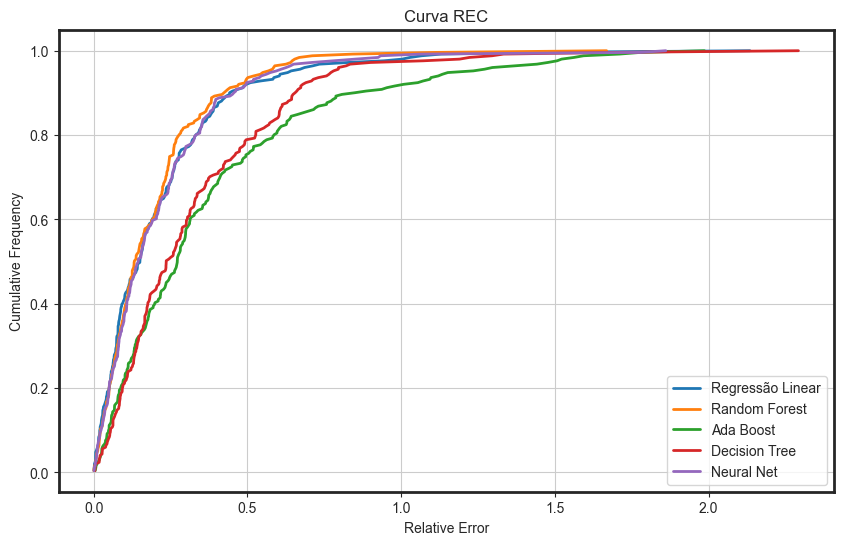

In [154]:
all_curves = {**c_rl, **c_rf, **c_ada, **c_dt, **c_rn}

# Plotar todas as curvas REC
plot_rec_curves(all_curves)

# tarefa classificação

In [107]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report, confusion_matrix

#### verificar se há desbalanceamento na target

In [116]:
import matplotlib.pyplot as plt
y=subset_1['price']
bins = [0, 10000, 30000, 60000, 100000, float('inf')]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Luxo']
y = pd.cut(y, bins=bins, labels=labels)
contagem_classes = y.value_counts()
print(contagem_classes)

dados = {'price': ['Baixo', 'Médio', 'Muito Baixo', 'Alto', 'Luxo'],
         'count': [1109, 900, 328, 291, 143]}

df = pd.DataFrame(dados)
df['proporção'] = df['count'] / df['count'].sum()
print(df)

price
Baixo          1191
Médio          1083
Alto            385
Muito Baixo     360
Luxo            188
Name: count, dtype: int64
         price  count  proporção
0        Baixo   1109   0.400217
1        Médio    900   0.324792
2  Muito Baixo    328   0.118369
3         Alto    291   0.105016
4         Luxo    143   0.051606


In [109]:
import matplotlib.pyplot as plt
y=subset_1_s_out['price']
bins = [0, 10000, 30000, 60000, 100000, float('inf')]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Luxo']
y = pd.cut(y, bins=bins, labels=labels)
contagem_classes = y.value_counts()
print(contagem_classes)

dados = {'price': ['Baixo', 'Médio', 'Muito Baixo', 'Alto', 'Luxo'],
         'count': [1109, 900, 328, 291, 143]}

df = pd.DataFrame(dados)
df['proporção'] = df['count'] / df['count'].sum()
print(df)

price
Baixo          1109
Médio           900
Muito Baixo     328
Alto            291
Luxo            143
Name: count, dtype: int64
         price  count  proporção
0        Baixo   1109   0.400217
1        Médio    900   0.324792
2  Muito Baixo    328   0.118369
3         Alto    291   0.105016
4         Luxo    143   0.051606


#### modelo classificação

In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
import seaborn as sns
import matplotlib.pyplot as plt  # Importar também o matplotlib para controle adicional sobre os gráficos
def modelo_classificacao(n,X,y):
    bins = [0, 10000, 30000, 60000, 100000, float('inf')]
    labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Luxo']
    y = pd.cut(y, bins=bins, labels=labels)
    y_true_all, y_pred_all,y_pred_all_original = [], [],[]

    for train_index, test_index in kf.split(X):
        # Dividir dados em treino e teste
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        features_num=X.select_dtypes(include=['int64','float64']).columns.tolist()
        features_cat=X.select_dtypes(include=['object','category']).columns.tolist()

        preprocessor = make_column_transformer(
            (StandardScaler(), features_num),
            (OneHotEncoder(handle_unknown="ignore"), features_cat),
            )
        
        # Aplicar preprocessamento
        X_train_norm = preprocessor.fit_transform(X_train)
        X_test_norm = preprocessor.transform(X_test)

        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_norm, y_train)
         
        if n==6:
            model=svm(X_train_smote,y_train_smote)
        elif n==7:
            model=decision_tree_cl(X_train_smote,y_train_smote)
        elif n==8:
            model=regressao_logistica(X_train_smote,y_train_smote)
        elif n==9:
            model=ada_boost_cl(X_train_smote,y_train_smote)
        else:
            model, y_test, le=rn_cl(X_train_smote,y_train_smote,X_test_norm,y_test)

        y_pred = model.predict(X_test_norm)
        y_pred_all_original.extend(y_pred)

        if n==10:
            y_pred = np.argmax(y_pred, axis=1)
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    if n==6:
            y_test_binarized = label_binarize(y_true_all, classes=np.unique(y_true_all))
            y_pred_binarized = label_binarize(y_pred_all, classes=np.unique(y_pred_all))
            curva_roc(y_test_binarized ,y_pred_binarized,labels)
    elif n==10:
        y_test_cat = to_categorical(y_true_all)
        curva_roc_rn(y_test_cat,y_pred_all_original,le)
    else: 
        y_score = model.predict_proba(X_test_norm)
        y_test_bin = label_binarize(y_test, classes=labels)
        curva_roc(y_test_bin,y_score,labels)

    repertorio=classification_report(y_true_all, y_pred_all, target_names=labels)

    matrix = confusion_matrix(y_true_all, y_pred_all)
    print(plot_confusion_matrix(matrix, labels))
    
    return print(repertorio)

#### Curva ROC

In [118]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def curva_roc(y_test_binarized ,y_pred_binarized,labels):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotando a curva ROC para cada classe
    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {labels[i]}')

    plt.plot([0, 1], [0, 1], 'k--')  # Linha de não discriminação
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

In [112]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns

def curva_roc_rn(y_test_cat, y_pred_nn, le):
    y_test_cat = np.array(y_test_cat)
    y_pred_nn = np.array(y_pred_nn)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_cat.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_nn[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular a curva ROC média (macro)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plotar todas as curvas ROC
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')  # Linha de não discriminação
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'blue', 'yellow', 'pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC classe {le.classes_[i]} (área = {roc_auc[i]:.2f})')

    plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle=':', linewidth=4, label=f'ROC média (macro) (área = {roc_auc["macro"]:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC para cada classe')
    plt.legend(loc="lower right")
    plt.show()


In [113]:
def plot_confusion_matrix(matrix, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

# previsões (classificação)

### SVM

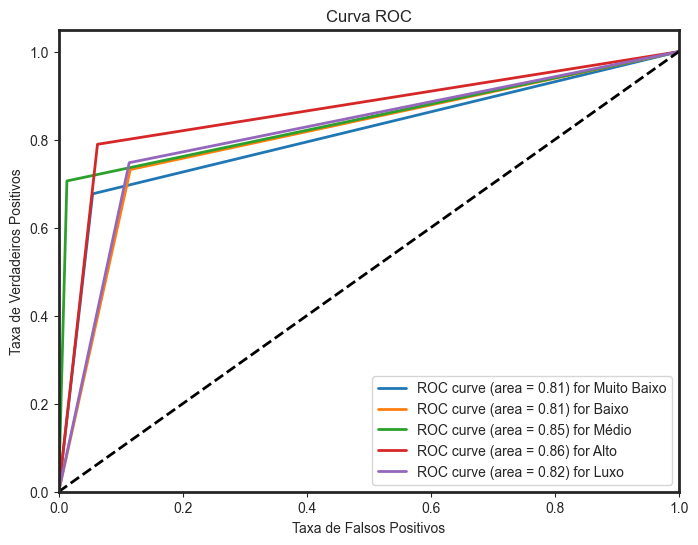

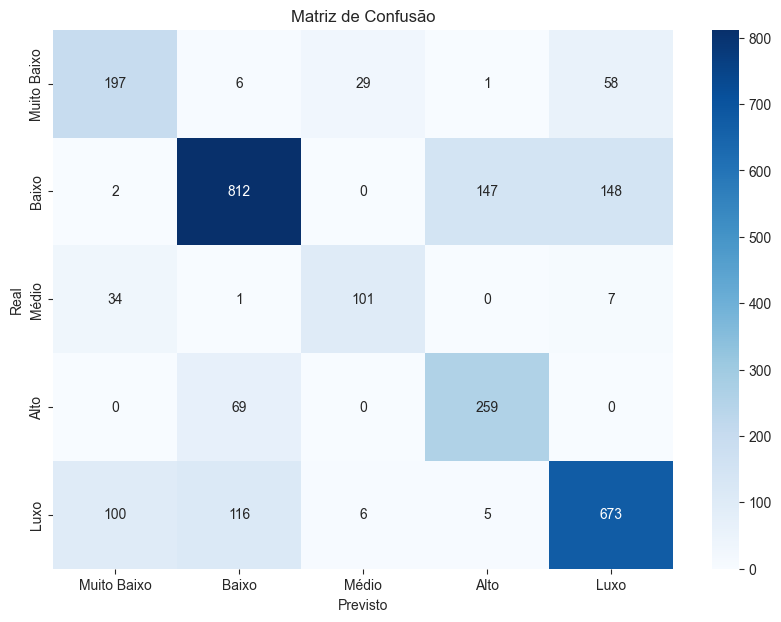

None
              precision    recall  f1-score   support

 Muito Baixo       0.59      0.68      0.63       291
       Baixo       0.81      0.73      0.77      1109
       Médio       0.74      0.71      0.72       143
        Alto       0.63      0.79      0.70       328
        Luxo       0.76      0.75      0.75       900

    accuracy                           0.74      2771
   macro avg       0.71      0.73      0.72      2771
weighted avg       0.75      0.74      0.74      2771



In [119]:
from sklearn.svm import SVC

def svm(X_train_smote, y_train_smote):
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train_smote, y_train_smote)
    return svm_model

modelo_classificacao(6, XX, yy)

## Decison Tree Classification

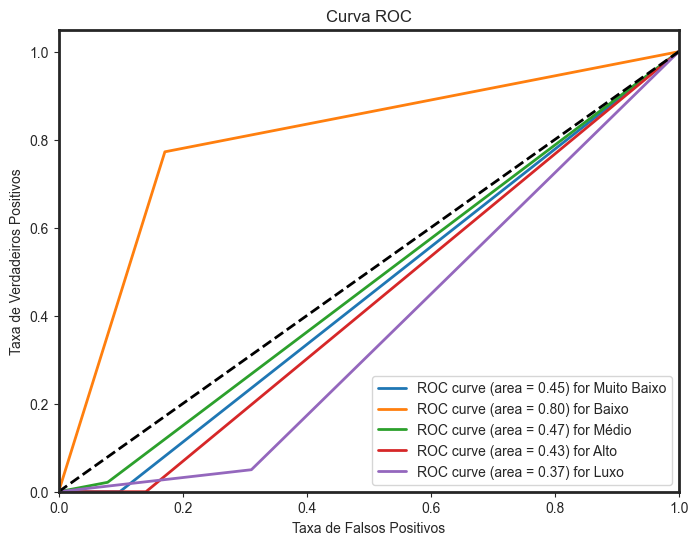

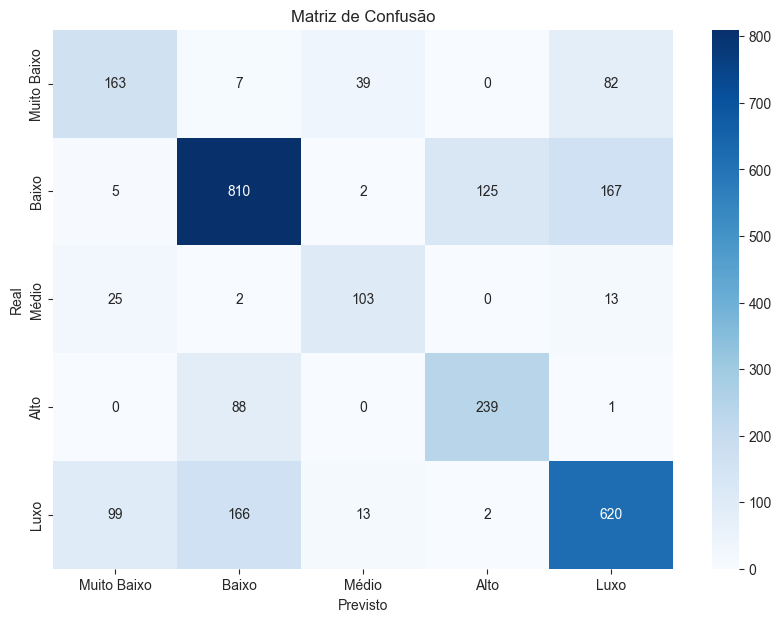

None
              precision    recall  f1-score   support

 Muito Baixo       0.56      0.56      0.56       291
       Baixo       0.75      0.73      0.74      1109
       Médio       0.66      0.72      0.69       143
        Alto       0.65      0.73      0.69       328
        Luxo       0.70      0.69      0.70       900

    accuracy                           0.70      2771
   macro avg       0.66      0.69      0.67      2771
weighted avg       0.70      0.70      0.70      2771



In [120]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_cl(X_train_smote,y_train_smote):
    model = DecisionTreeClassifier(random_state=42, )
    model.fit(X_train_smote, y_train_smote)
    return model
modelo_classificacao(7,XX,yy)

## Regressão Logística

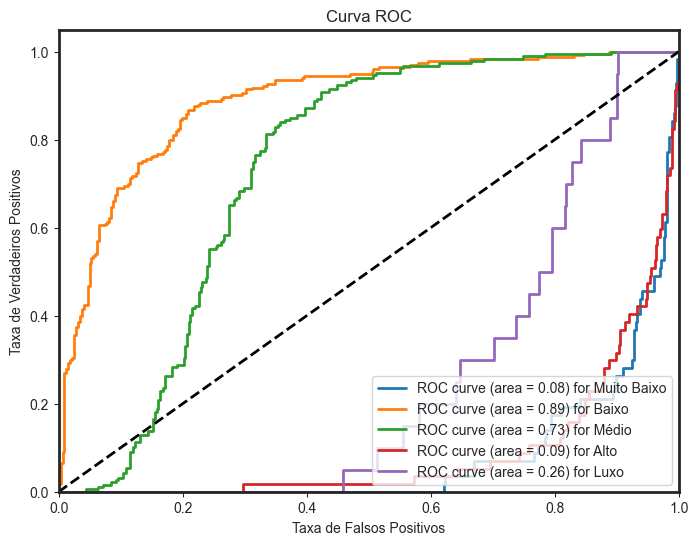

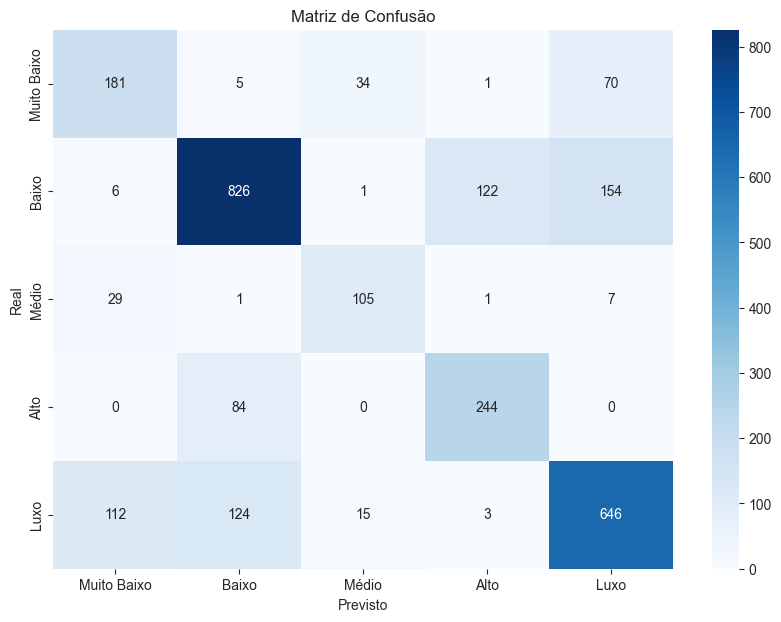

None
              precision    recall  f1-score   support

 Muito Baixo       0.55      0.62      0.58       291
       Baixo       0.79      0.74      0.77      1109
       Médio       0.68      0.73      0.70       143
        Alto       0.66      0.74      0.70       328
        Luxo       0.74      0.72      0.73       900

    accuracy                           0.72      2771
   macro avg       0.68      0.71      0.70      2771
weighted avg       0.73      0.72      0.72      2771



In [121]:
from sklearn.linear_model import LogisticRegression

def regressao_logistica(X_train_smote,y_train_smote):
    model = LogisticRegression(random_state=42)
    model.fit(X_train_smote, y_train_smote)
    return model
    
modelo_classificacao(8,XX,yy)


## Net - classificação

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


def rn_cl(X_train_smote,y_train_smote,X_test_norm,y_test):
# transformação numerica
    le = LabelEncoder()
    y_train_smote_num = le.fit_transform(y_train_smote)
    y_test_num = le.transform(y_test)

    #vetores binarios
    y_train_smote_cat = to_categorical(y_train_smote_num)
    y_test_cat = to_categorical(y_test_num)

    # O mesmo que em regressão
    def create_nn_model(input_dim, output_dim):
        model = Sequential()
        model.add(Dense(64, input_dim=input_dim, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))  # Para classificação multiclasse
        return model

    input_dim = X_train_smote.shape[1]
    output_dim = y_train_smote_cat.shape[1]

    nn_model = create_nn_model(input_dim, output_dim)
    nn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Treinar o modelo
    nn_model.fit(X_train_smote, y_train_smote_cat, epochs=50, batch_size=32, validation_split=0.2)
    return nn_model,y_test_num,le

modelo_classificacao(10,X4out,y4out)


## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def ada_boost_cl(X_train_smote,y_train_smote):
    ada_clf = AdaBoostClassifier(random_state=42)
    ada_clf.fit(X_train_smote, y_train_smote)
    return ada_clf
    
modelo_classificacao(9,X4out,y4out)